# Introducción

Como Data Analyst, el trabajo consiste en hacer que las empresas maximicen el valor de sus recursos de datos por medio de herramientas de visualización y elaboración de informes. Es el responsable de la generación de perfiles, la limpieza y la transformación de los datos. Sus responsabilidades también incluyen el diseño y la creación de modelos de datos escalables y eficaces, y la habilitación e implementación de las capacidades analíticas avanzadas en informes para el análisis.

El proyecto se basa en una cadena de gimnasios "Model Fitness" está desarrollando una estrategia de interacción con clientes basada en datos analíticos. En este ocasión se pretende estudiar el perfil de sus clientes, analizarlo y elaborar una estrategia de retención; con el fin de enfrentar el problema de pérdida de clientes, al mismo tiempo se planea realizar las siguientes actividades que son esenciales para, preprocesar los datos, estudiar y comprobar los datos, construir un modelo para predecir la cancelación de usuarios, crear clústeres de usuarios y escribir una conclusión general.



# Inicialización

In [1]:
# Cargar todas las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Paso 1. Abrir el archivo de datos y leer la información general

In [2]:
# Carga de archivo de datos en el DataFrames
df_gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
# Imprime la información general/resumida sobre el DataFrame datasets/gym_churn_us
df_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# Imprime una muestra de los datos para datasets/gym_churn_us
df_gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
# Imprime la descripción general/resumen estadístico sobre el DataFrame logs_exp_us
df_gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
#Bucle para reemplazo de los nombres de las columnas en minúsculas.

new_col_names = []

for old_name in df_gym.columns:
    # Luego, pon todas las letras en minúsculas
    name_lowered = old_name.lower()
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_names.append(name_lowered)

# Reemplaza los nombres anteriores por los nuevos
df_gym.columns = new_col_names

print(df_gym.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')


Para el desarollo de este proyecto se importo un dataset la cual contiene 14 columna. El dataframe contiene dos tipos de datos float64 e int64, los encabezados estan combinados entres mayúsculas y minuscula, la cual fue transformado todo a miniscula. Por último, se imprime la descripción general y resumen estadístico sobre los datos que contiene el dataset.

# Paso 2. Llevar a cabo el análisis exploratorio de datos (EDA)

•	Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [7]:
# Revisar si hay dagos duplicados en el Dataframe
print(df_gym.duplicated().sum()) 

0


In [8]:
# Describe el resumen estadístico
df_gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Según se observa en el datasat, no se encontraron valores ausentes y se puede apreciar la distribución de las medias, la desviacion estandar, y otros valores en las columnas del dataframe.

•	Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [9]:
df_gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Al ejectar el método gropuby, se puede apreciar en la tabla, los valores medios en todas las columnas del dataset en ambos grupos de las personas que cancelaron(1) y las que se quedaron(0).

•	Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

In [10]:
people_stayed = df_gym.query('churn == 0')
people_stayed.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

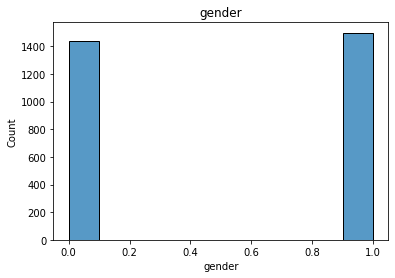

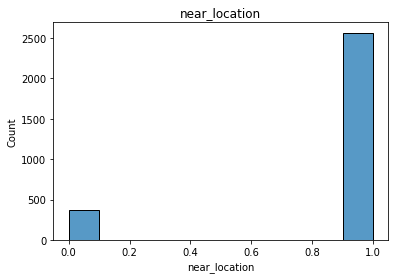

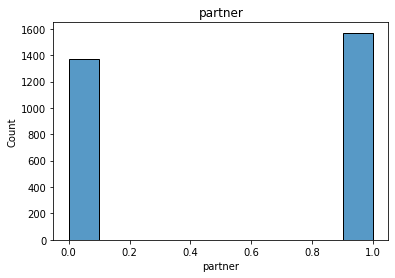

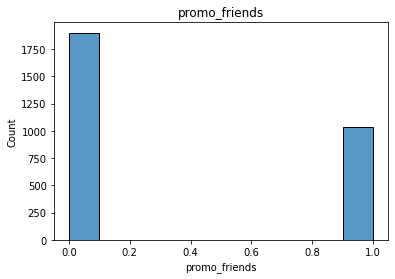

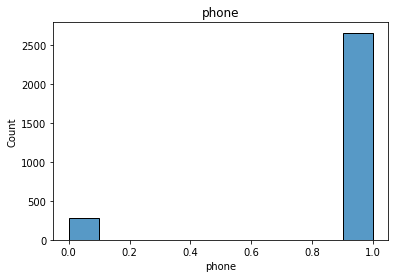

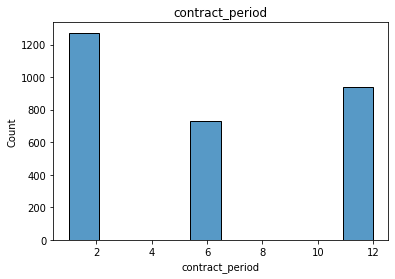

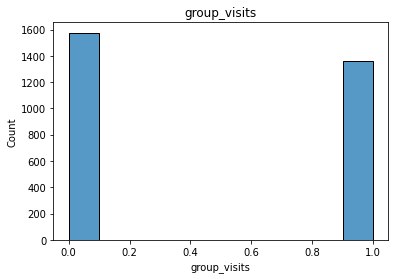

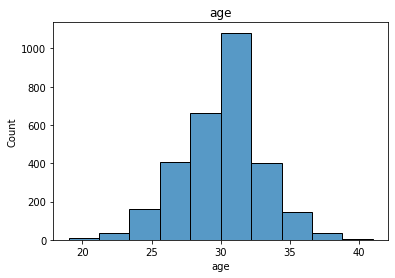

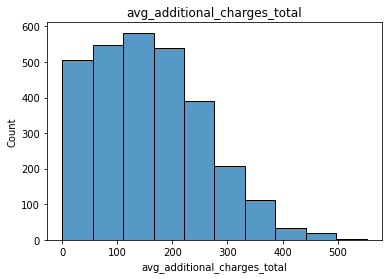

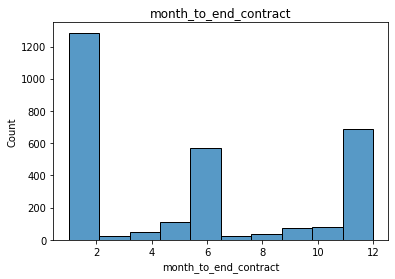

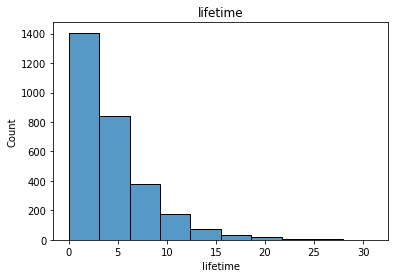

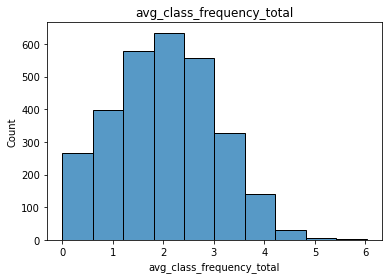

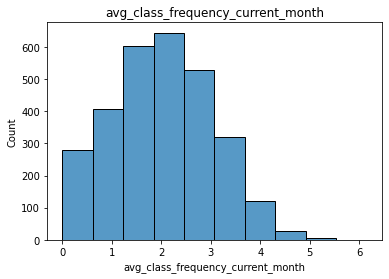

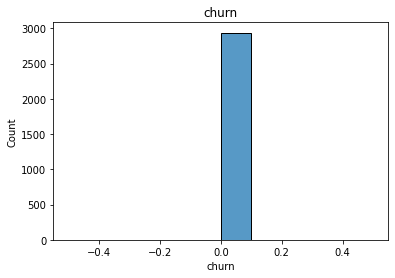

In [11]:
for feature in people_stayed.columns:
    sns.histplot(people_stayed[feature], bins=10)
    plt.title(feature)
    plt.show()

In [12]:
people_left = df_gym.query('churn == 1')
people_left.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

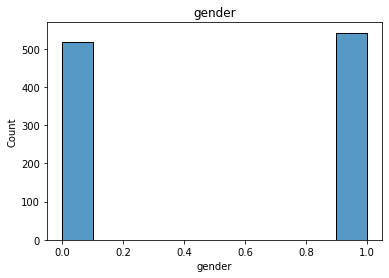

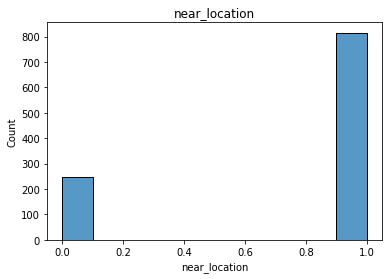

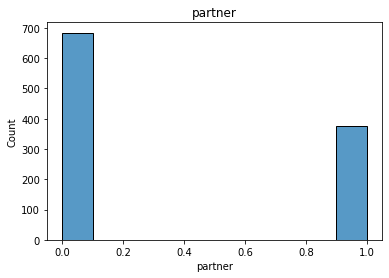

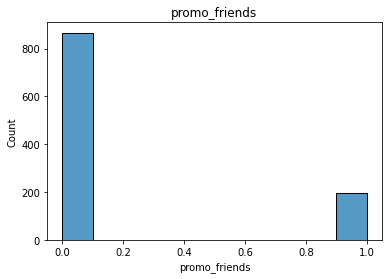

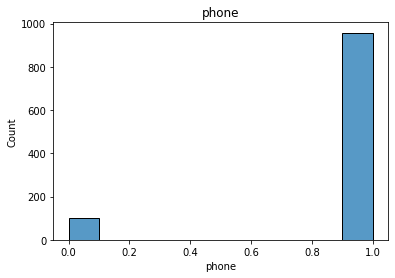

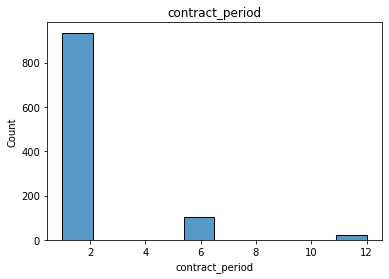

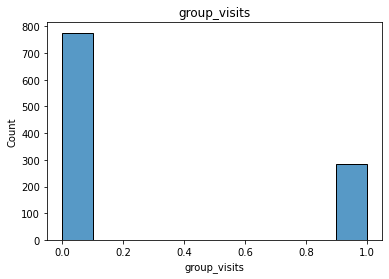

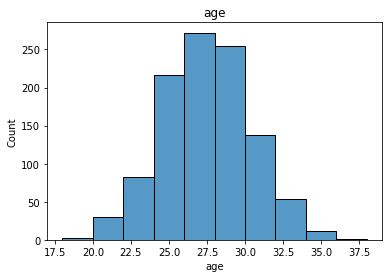

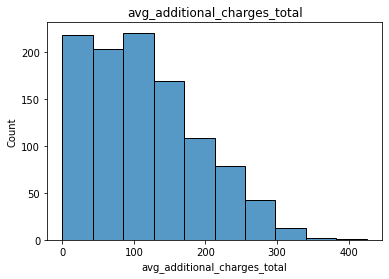

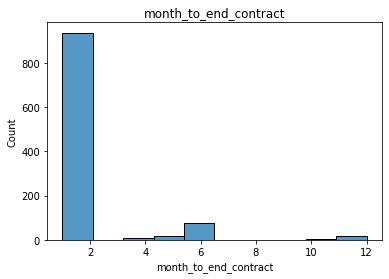

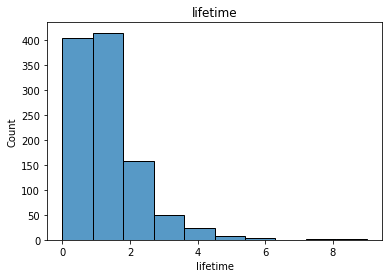

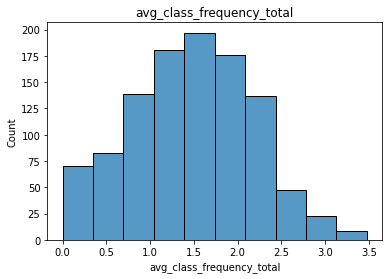

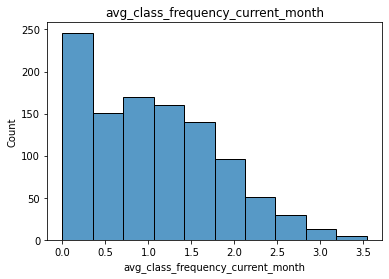

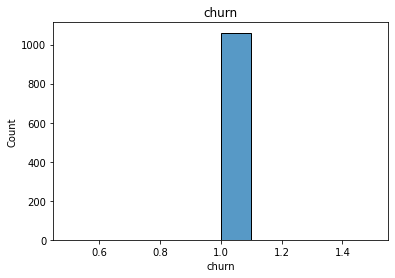

In [13]:
for feature in people_left.columns:
    sns.histplot(people_left[feature], bins=10)
    plt.title(feature)
    plt.show()

Con base a los gráficos, se puede apreciar la distribución de características para aquellas personas que se fueron y se quedaron, los datos en ambos grupos es muy variada, especialmente en las columnas 'age', 'avg_additional_charges_total', 'lifetime', y 'avg_class_frequency_total'.

• Crea una matriz de correlación y muéstrala.

In [14]:
# Matriz de correlación
matrix = df_gym.corr()
matrix

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


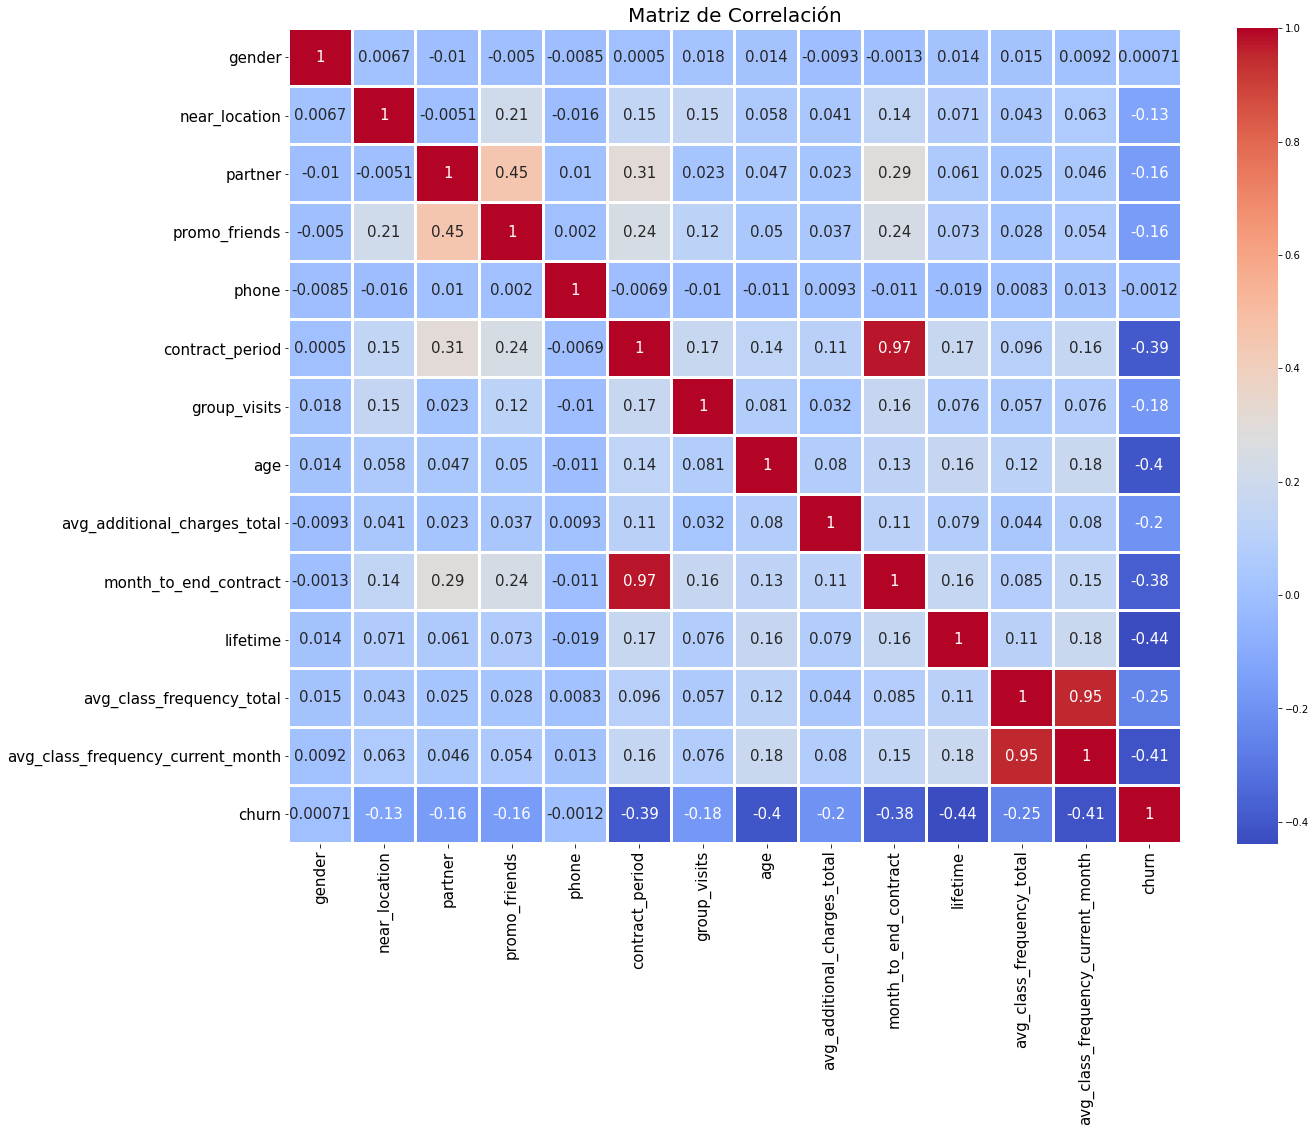

In [15]:
# Mapa de Calor de la matriz de correlación
plt.subplots(figsize=(20, 15))
sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=2, 
            annot_kws={'fontsize':15})
plt.title('Matriz de Correlación', fontsize = 20)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.show()   

Se puede observar en la matriz que hay variables que poseen una conexión débil y otras fuertes; sin embargo, no hay características propensas a proporcionar la respuesta correcta, pero hay algunas característcas correlacionadas.

# Paso 3. Construir un modelo para predecir la cancelación de usuarios

Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

• Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [16]:
X = df_gym.drop('churn', axis=1)
y = df_gym['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Al dividir los en conjuntos y validar su función a traves del metodo train_test_split, se puede afirmar que el modelo entrenará el 80% de los datos y se comprobará a sí mismos con el 20% restante.

•	Entrena el modelo en el set de entrenamiento con dos métodos:

o	regresión logística;

o	bosque aleatorio.


In [17]:
df_gym_modelo = pd.get_dummies(df_gym, columns=['contract_period'])
df_gym_modelo

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,contract_period_1,contract_period_6,contract_period_12
0,1,1,1,1,0,1,29,14.227470,5.0,3,0.020398,0.000000,0,0,1,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,1.922936,1.910244,0,0,0,1
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,1,0,0
3,0,1,1,1,1,1,33,62.669863,12.0,2,3.205633,3.357215,0,0,0,1
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,0,33,2.406023,12.0,8,2.284497,2.349070,0,0,0,1
3996,0,1,0,0,1,1,29,68.883764,1.0,1,1.277168,0.292859,1,1,0,0
3997,1,1,1,1,1,0,28,78.250542,11.0,2,2.786146,2.831439,0,0,0,1
3998,0,1,1,1,1,0,32,61.912657,5.0,3,1.630108,1.596237,0,0,1,0


In [18]:
# Modelo Uno
modelo_1 = RandomForestClassifier(random_state=0)
modelo_1.fit(X_train, y_train)
predictions1 = modelo_1.predict(X_test)
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions1)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions1)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions1)))

Exactitud: 0.92
Precisión: 0.84
Recall: 0.82


In [19]:
# Modelo 2
modelo_2 = LogisticRegression()
modelo_2.fit(X_train, y_train)
predictions2 = modelo_2.predict(X_test)
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions2)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions2)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions2)))

Exactitud: 0.92
Precisión: 0.87
Recall: 0.81


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


•	Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

Recuerda indicar el parámetro random_state cuando dividas los datos y definas el algoritmo. 

Al aplicar los 2 métodos, se puede apreciar que en ambos modelos, la exactitud se encuentra en un buen margen segun el 80% de las predicciones realizadas, y la precisión y recall aun tienen un margen de mejora. Sin embargo, las tres métricas en ambos modelos se encuentran en buena forma.

# Paso 4. Crear clústeres de usuarios/as

Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

•	Estandariza los datos.

In [20]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

•	Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

In [ ]:
linked = linkage(X_sc, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Agrupación')
plt.show()

•	Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

In [ ]:
km = KMeans(n_clusters=5)
labels = km.fit_predict(X_sc)

•	Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [ ]:
df_gym['cluster_km'] = labels
df_gym.groupby('cluster_km').mean()

Según los datos obtenitos en la tabla, se puede apreciar que en los clusteres hay valores que son llamativos en algunas columnas, lo que puede significar que haya una relación significativa entre ambas partes.

•	Traza distribuciones de características para los clústeres. ¿Notas algo?

In [ ]:
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(df[x_name], df[y_name], hue=df[cluster_name], palette='Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [ ]:
show_clusters_on_plot(df_gym, 'avg_additional_charges_total', 'avg_class_frequency_total', 'cluster_km')

In [ ]:
show_clusters_on_plot(df_gym, 'avg_additional_charges_total', 'month_to_end_contract', 'cluster_km')

Según la distribución par los clusteres, se puede observar que los parámetros de mes para terminar el contrato y el catgo adicional total resultaron ser características limítrofes para los clústeres. Como podemos ver en el gráfico de distribución pareado de estas variables, apenas se intersecan. En cambio, en el resto de parámetros son bastantes similares y no difieren tanto.

•	Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [ ]:
df_gym.groupby('cluster_km').agg({'churn': 'mean'})

Al momento de agrupar los datos, se puede apreciar que el cuarto grupo es más propenso en irse y el tercero es el más leal, y la mayoría difieren en términos de tasa de cancelación.

# Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.

No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.

Al finalizar el análisis de los datos se puede concluir lo siguiente:

El dataset analizado no cuenta con valores ausentes y al mismo tiempo fue necesario el trazo de algunos histogramas para observar el comportamiento de las distribuciones de algunas variables, también, se ejecuto una matriz de correlación con su respectivo mapa de calor para analizar las relaciones entre variables.

Después de analizar los datos y las pruebas de predicción con las distintas métricas, se puede concluir que existen distintos factores que influyen en la tasa de cancelación y la retención del cliente, como el pago promedio total, el periodo de contrato, el mes para finalizar, etc. Además, se recomienda lo siguiente para mejorar la interacción y retención con los clientes: Personalización y mejora de la comunicación activa, Mejora de la experiencia del cliente y Programas de fidelización y recompensas.
